# ALeRCE API interaction examples

Load libraries

In [1]:
import sys
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.io.json import json_normalize
from astropy.time import Time
from datetime import datetime
from IPython.display import HTML

from alerce.api import AlerceAPI

See https://github.com/alercebroker/usecases/blob/master/api/ALeRCE%20ZTF%20DB%20API.md

In [2]:
# continuously load modules (for easier debugging)
%load_ext autoreload
%autoreload 2

# Initialize alerce api object

In [3]:
alerce = AlerceAPI()

# 1. query

Query a list of objects

The following json file should be sent

```js
{
total: number, // (if not set the total is counted and the query is slower),
records_per_pages: number. // default 20
page: number (default 1),
sortBy: string columnName, // default nobs
query_parameters:{
    filters:{
        //ZTF Object id
        oid: "ZTFXXXXXX",
        //Number of detections
        nobs: { 
            min: int
            max: int
        },
        //Late Classifier (Random Forest)
        classrf: ["CEPH","DSCT","EB","LPV","RRL","SNe","Other"] or int,
        pclassrf: float [0-1],
        //Early Classifier (Stamp Classifier)
        classearly: ["AGN","SN","VS","asteroid","bogus"] or int,
        pclassearly: float [0-1],
    },
    //Coordinate based search (RA,DEC) and Search Radius.
    coordinates:{
        ra: float degrees,
        dec: float degrees,
        sr: float degrees
    },
    dates:{
        //First detection (Discovery date)
        firstmjd: {
         min: float mjd,
         max: float mjd
        }
    }
}
```

### Example: 

Give me all the objects with probability of being SNe greater than 0.8 according to the random forest classifier (light curve based), which have between 2 and 40 detections. Give me the second page, with pages of 10 elements each, of a total of at most 40 objects query result.

Note: probabilities are experimental and should not be fully trusted

In [4]:
total = 40
records_per_page = 10
page = 2
sortBy = "firstmjd"
nobsmin = 10
nobsmax = 40
classrf = "SNe"
pclassrf = 0.8

params = {
    "total": total,
    "records_per_pages": records_per_page,
    "page": page,
    "sortBy": sortBy,
    "query_parameters": {
        "filters": {
            "nobs": { 
                "min": nobsmin,
                "max": nobsmax
            },
            "classrf": classrf,
            "pclassrf": pclassrf
        }
    }
}

In [5]:
query_results = alerce.query(params)
query_results.head()

,catalogid,classearly,classrf,classxmatch,deltajd,first_magap_g,first_magap_r,first_magpsf_g,first_magpsf_r,firstmjd,...,nobs,pclassearly,pclassrf,period,sigma_magap_g,sigma_magap_r,sigma_magpsf_g,sigma_magpsf_r,sigmadec,sigmara
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19ablekwo,None,SN,6,None,29.929456,19.643200,19.394400,19.937077,19.435888,58697.474363,...,17,0.999589,0.800,None,0.399619,0.342431,0.442817,0.257825,0.000026,0.000047
ZTF19ablesob,None,None,6,None,29.961620,19.430201,19.760201,19.483698,19.729057,58695.415093,...,20,NaN,0.842,None,0.503572,0.686431,0.481555,0.637454,0.000015,0.000011
ZTF19abloocj,None,SN,6,None,31.059074,20.024300,20.180201,20.374308,20.492908,58696.428137,...,30,0.999269,0.880,None,0.327595,0.402456,0.407508,0.366603,0.000021,0.000027
ZTF19ablpfhz,None,SN,6,None,29.043935,19.297600,19.292801,19.211479,19.203821,58696.451701,...,20,0.998146,0.902,None,0.373591,0.339308,0.414614,0.298704,0.000013,0.000026
ZTF19ablpnmk,None,SN,6,None,29.020463,19.664801,20.113701,19.805483,19.919849,58696.463738,...,21,1.000000,0.802,None,0.343581,0.420156,0.151708,0.334835,0.000039,0.000050


### Example: 

Give me the last 100 objects with classified as SNe according to the early classifier (one image stamp)

Note: this is experimental, about 90% of the candidates are false positives

In [6]:
mjd_48hr = Time(datetime.utcnow(), scale='utc').mjd - 2.

total = 100
records_per_page = 100
sortBy = "pclassearly"

params = {
    "total": total,
    "records_per_pages": records_per_page,
    "sortBy": sortBy,
    "query_parameters": {
        "filters": {
            "classearly": 2
        },
        "dates": {
            "firstmjd": {
                "min": mjd_48hr
            }
        }
    }
}

In [7]:
query_results = alerce.query(params)
query_results.head()

,catalogid,classearly,classrf,classxmatch,deltajd,first_magap_g,first_magap_r,first_magpsf_g,first_magpsf_r,firstmjd,...,nobs,pclassearly,pclassrf,period,sigma_magap_g,sigma_magap_r,sigma_magpsf_g,sigma_magpsf_r,sigmadec,sigmara
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19abvnkob,None,SN,None,None,0.0,16.058011,None,16.072726,None,58728.275255,...,1,0.630518,None,None,None,None,None,None,None,None
ZTF19abvnkoe,None,SN,None,None,0.0,16.000115,None,16.316786,None,58728.275255,...,1,0.741625,None,None,None,None,None,None,None,None
ZTF19abvnkoj,None,SN,None,None,0.0,15.845390,None,16.198460,None,58728.275255,...,1,0.565247,None,None,None,None,None,None,None,None
ZTF19abvnkpb,None,SN,None,None,0.0,13.551824,None,13.537934,None,58728.275255,...,1,0.931445,None,None,None,None,None,None,None,None
ZTF19abvnkpi,None,SN,None,None,0.0,19.552396,None,17.418259,None,58728.275255,...,1,0.663202,None,None,None,None,None,None,None,None


(20.212865754614146, 12.851902817885259)

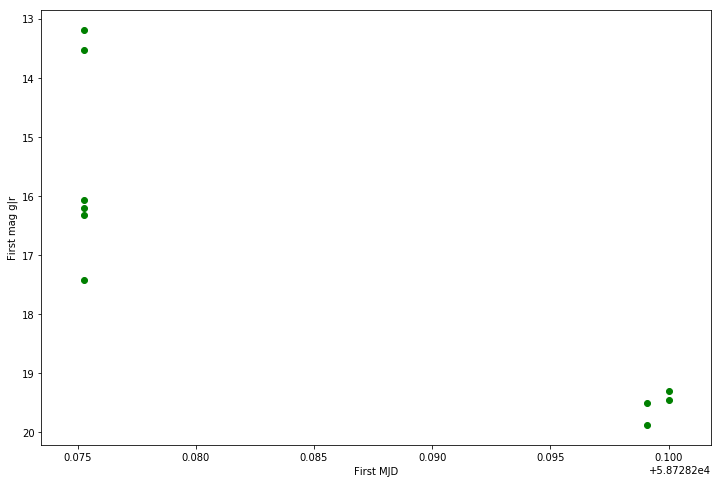

In [8]:
# Show first mag vs first MJD
fig, ax = plt.subplots(figsize = (12, 8))
mask = query_results.first_magpsf_r.notnull()
ax.scatter(query_results.firstmjd[mask], query_results.first_magpsf_r[mask], c = 'r')
mask = query_results.first_magpsf_g.notnull()
ax.scatter(query_results.firstmjd[mask], query_results.first_magpsf_g[mask], c = 'g')
ax.set_xlabel("First MJD")
ax.set_ylabel("First mag g|r")
ax.set_ylim(ax.get_ylim()[::-1])

You can see the ZTF filter changes during the night. The missing times are due to the ZTF private stream.

# 2. get_sql

Get the sql query using the same parameters as the previous query

In [9]:
alerce.get_sql(params)

b"SELECT * FROM objects WHERE  classearly = 'SN' AND  firstmjd >= 58727.912204766726 "

# 3. get_detections

Get all the detections for an object

In [10]:
oid = "ZTF19aaxqsbn"

In [11]:
detections = alerce.get_detections(oid)
display(detections.head())
list(detections)

,candid_str,dec,diffmaglim,distpsnr1,fid,field,isdiffpos,magap,magap_corr,magnr,...,rb,rcid,sgscore1,sigmadec,sigmagap,sigmagap_corr,sigmagnr,sigmapsf,sigmapsf_corr,sigmara
candid,,,,,,,,,,,,,,,,,,,,,
886240045615015003,886240045615015003,80.162942,20.342619,1.676753,2,862,1,19.145700,19.145700,16.899,...,0.944286,56,0.196298,0.09,0.1670,0.1670,0.073,0.111001,0.111001,0.09
889199085615015000,889199085615015000,80.162995,20.061783,1.792658,1,862,1,19.063999,19.063999,17.948,...,0.750000,56,0.196298,0.09,0.1374,0.1374,0.062,0.153750,0.153750,0.09
889249055615015001,889249055615015001,80.162994,20.234301,1.745674,2,862,1,18.581699,18.581699,16.899,...,0.947143,56,0.196298,0.09,0.1058,0.1058,0.073,0.085079,0.085079,0.09
892240745615015005,892240745615015005,80.162949,19.379860,1.706684,2,862,1,18.940800,18.940800,16.899,...,0.892857,56,0.196298,0.09,0.2974,0.2974,0.073,0.104200,0.104200,0.09
895195845615015003,895195845615015003,80.162940,19.375284,1.912989,1,862,1,18.676800,18.676800,17.948,...,0.951429,56,0.196298,0.09,0.1865,0.1865,0.062,0.112041,0.112041,0.09


['candid_str',
 'dec',
 'diffmaglim',
 'distpsnr1',
 'fid',
 'field',
 'isdiffpos',
 'magap',
 'magap_corr',
 'magnr',
 'magpsf',
 'magpsf_corr',
 'mjd',
 'object_id',
 'oid',
 'ra',
 'rb',
 'rcid',
 'sgscore1',
 'sigmadec',
 'sigmagap',
 'sigmagap_corr',
 'sigmagnr',
 'sigmapsf',
 'sigmapsf_corr',
 'sigmara']

# 4. get_non_detections

In [12]:
non_detections = alerce.get_non_detections(oid)
non_detections.head()

,diffmaglim,fid,object_id,oid
mjd,,,,
58617.203958,19.953899,1,None,ZTF19aaxqsbn
58617.203958,19.953899,1,None,ZTF19aaxqsbn
58617.203958,19.953899,1,None,ZTF19aaxqsbn
58617.203958,19.953899,1,None,ZTF19aaxqsbn
58617.297940,19.972601,2,None,ZTF19aaxqsbn


(20.85893068626529, 15.77118088180006)

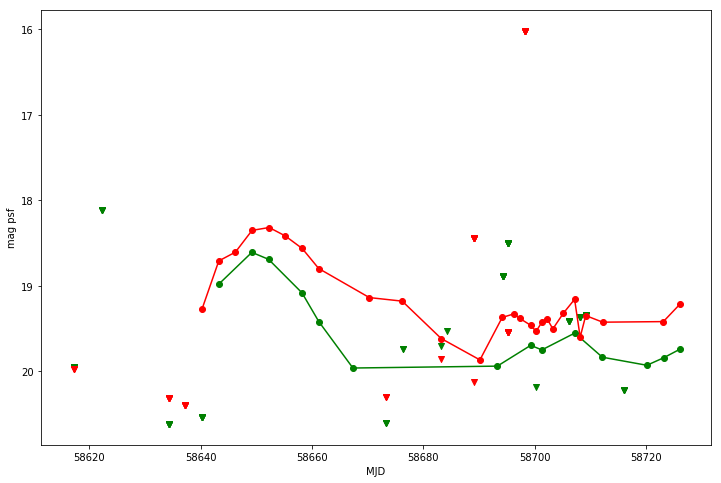

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
colors = ["g", "r"]
for fid in [1, 2]:
    mask = detections.fid == fid
    ax.plot(detections.mjd[mask], detections.magpsf[mask], c = colors[fid - 1], marker = "o")
    mask = non_detections.fid == fid
    # note that the index of non-detectionsis the mjd
    ax.scatter(non_detections.index[mask], non_detections.diffmaglim[mask], c = colors[fid - 1], marker = "v")
ax.set_xlabel("MJD")
ax.set_ylabel("mag psf")
ax.set_ylim(ax.get_ylim()[::-1])

# 5. get_stats

In [14]:
stats = alerce.get_stats(oid)
display(stats)
list(stats)

,catalogid,classearly,classrf,classxmatch,deltajd,first_magap_g,first_magap_r,first_magpsf_g,first_magpsf_r,firstmjd,...,nobs,pclassearly,pclassrf,period,sigma_magap_g,sigma_magap_r,sigma_magpsf_g,sigma_magpsf_r,sigmadec,sigmara
oid,,,,,,,,,,,,,,,,,,,,,
ZTF19aaxqsbn,None,SN,6,None,85.914155,19.063999,19.1457,18.982498,19.270462,58640.240046,...,41,0.999165,0.658,None,0.509753,0.469893,0.470786,0.421461,0.000044,0.000244


['catalogid',
 'classearly',
 'classrf',
 'classxmatch',
 'deltajd',
 'first_magap_g',
 'first_magap_r',
 'first_magpsf_g',
 'first_magpsf_r',
 'firstmjd',
 'last_magap_g',
 'last_magap_r',
 'last_magpsf_g',
 'last_magpsf_r',
 'lastmjd',
 'max_magap_g',
 'max_magap_r',
 'max_magpsf_g',
 'max_magpsf_r',
 'mean_magap_g',
 'mean_magap_r',
 'mean_magpsf_g',
 'mean_magpsf_r',
 'meandec',
 'meanra',
 'median_magap_g',
 'median_magap_r',
 'median_magpsf_g',
 'median_magpsf_r',
 'min_magap_g',
 'min_magap_r',
 'min_magpsf_g',
 'min_magpsf_r',
 'nobs',
 'pclassearly',
 'pclassrf',
 'period',
 'sigma_magap_g',
 'sigma_magap_r',
 'sigma_magpsf_g',
 'sigma_magpsf_r',
 'sigmadec',
 'sigmara']

# 6. get_probabilities

In [15]:
alerce.get_probabilities(oid)

(              agn_prob  asteroid_prob  bogus_prob classifier_version  \
 oid                                                                    
 ZTF19aaxqsbn  0.000005   5.469358e-09    0.000829               None   
 
                sn_prob       vs_prob  
 oid                                   
 ZTF19aaxqsbn  0.999165  4.666816e-10  ,
               ceph_prob  classifierid  dsct_prob  eb_prob  lpv_prob object_id  \
 oid                                                                             
 ZTF19aaxqsbn      0.026             1      0.006    0.016     0.076      None   
 
               other_prob  rrl_prob  sne_prob  
 oid                                           
 ZTF19aaxqsbn        0.14     0.078     0.658  )

In [17]:
probs = alerce.get_probabilities(oid)
display(probs[0])
display(probs[1])

,agn_prob,asteroid_prob,bogus_prob,classifier_version,sn_prob,vs_prob
oid,,,,,,
ZTF19aaxqsbn,0.000005,5.469358e-09,0.000829,None,0.999165,4.666816e-10


,ceph_prob,classifierid,dsct_prob,eb_prob,lpv_prob,object_id,other_prob,rrl_prob,sne_prob
oid,,,,,,,,,
ZTF19aaxqsbn,0.026,1,0.006,0.016,0.076,None,0.14,0.078,0.658


In [21]:
probs

(              agn_prob  asteroid_prob  bogus_prob classifier_version  \
 oid                                                                    
 ZTF19aaxqsbn  0.000005   5.469358e-09    0.000829               None   
 
                sn_prob       vs_prob  
 oid                                   
 ZTF19aaxqsbn  0.999165  4.666816e-10  ,
               ceph_prob  classifierid  dsct_prob  eb_prob  lpv_prob object_id  \
 oid                                                                             
 ZTF19aaxqsbn      0.026             1      0.006    0.016     0.076      None   
 
               other_prob  rrl_prob  sne_prob  
 oid                                           
 ZTF19aaxqsbn        0.14     0.078     0.658  )

# 7. get_features

In [16]:
features = alerce.get_features(oid)
features

,result.period.n_samples_1,result.period.n_samples_2,result.period.periodls_1,result.period.periodls_2
oid,,,,
ZTF19aaxqsbn,10.0,24.0,74.074072,74.074072


# 8. get_stamp

Get the stamps of an object.

See https://github.com/alercebroker/usecases/blob/master/api/ALeRCE%20AVRO-STAMP%20Access%20API.md

In [13]:
# note that the index of detections is the candid
print(oid)
alerce.plot_stamp(oid)
alerce.plot_stamp(oid, detections.index.min())
alerce.plot_stamp(oid, detections.index.max())

ZTF19aaxqsbn
ZTF19aaxqsbn 886240045615015003


ZTF19aaxqsbn 886240045615015003


ZTF19aaxqsbn 969181571415010006
